In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt

from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from keras.models import load_model

## 載入測試資料

In [2]:
imagePaths_train = sorted(list(paths.list_images(".\\Dataset\\OK\\train")))
imagePaths_test = sorted(list(paths.list_images(".\\Dataset\\OK\\test")))

#IMAGE_DIMS = (32, 32, 3)
train_feature = []
train_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test_feature = []
test_label = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
for imagePath in imagePaths_train:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    train_feature.append(image)
for imagePath in imagePaths_test:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    test_feature.append(image)

In [4]:
train_feature = np.array(train_feature, dtype="float")
test_feature = np.array(test_feature, dtype="float")
train_label = np.array(train_label)
test_label = np.array(test_label)

#將 Features 特徵值轉換為 1024個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len( test_feature), 1024).astype('float32')
#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255
#label 轉換為 One-Hot Encoding 編碼
test_label_onehot = to_categorical(test_label)

## 載入訓練模型檔

In [5]:
model = load_model('OK_mlp_model.h5')

In [6]:
#預測
predict=model.predict(test_feature_normalize)
prediction=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 65ms/step


In [7]:
# 顯示圖片及預測結果的函數
import random

def plot_images_labels_prediction(images, labels, prediction=[], names=[], predictions_array=[], num=20):
    # 取得 pyplot 物件參考
    fig = plt.gcf()

    # 設定畫布大小為 12 吋*14吋
    fig.set_size_inches(12, 14)

    idx = random.randint(0, images.shape[0] - 1)

    # 限制最多顯示 20 個子圖
    if num > 20: num = 20

    # 依序顯示 num 個子圖
    for i in range(0, num):
        # 建立 5*5 個子圖中的第 i+1 個 
        ax = plt.subplot(5, 5, i + 1)

        # 顯示子圖
        ax.imshow(images[idx], cmap='gray')

        title = ""
        color = 'black'
        label = labels[idx]
        pred = None

        # 有預測值就加入標題中
        if len(prediction) > 0:
            if prediction[idx] != labels[idx]:
                color = 'red'
                confidence = 100 * np.min(predictions_array[idx])
            else:
                color = 'blue'
                confidence = 100 * np.max(predictions_array[idx])
            pred = prediction[idx]
        
        if len(names) > 0:
            # print(names)
            # print(label)
            label = names[label]
            if pred != None:
                pred = names[pred]

        title = "label = " + str(label)
        if pred != None: title += "\npredict = " + str(pred)

        title = "{}\nscore={:2.2f}%".format(title, confidence)

        # 設定標題
        ax.set_title(title, fontsize=10, color=color) 
        
        # 不顯示 x 、y軸刻度
        ax.set_xticks([]);  
        ax.set_yticks([]);
        
        # 樣本序號增量 1
        idx += 1    
        if idx >= images.shape[0]:
            idx = 0
    
    # 繪製圖形
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.show()

In [9]:
print(test_feature.shape)
#圖片原標籤
print(np.argmax(test_label_onehot, axis=1))
#圖片預測後標籤
print(np.argmax(predict, axis=1))

(10, 32, 32, 1)
[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1]


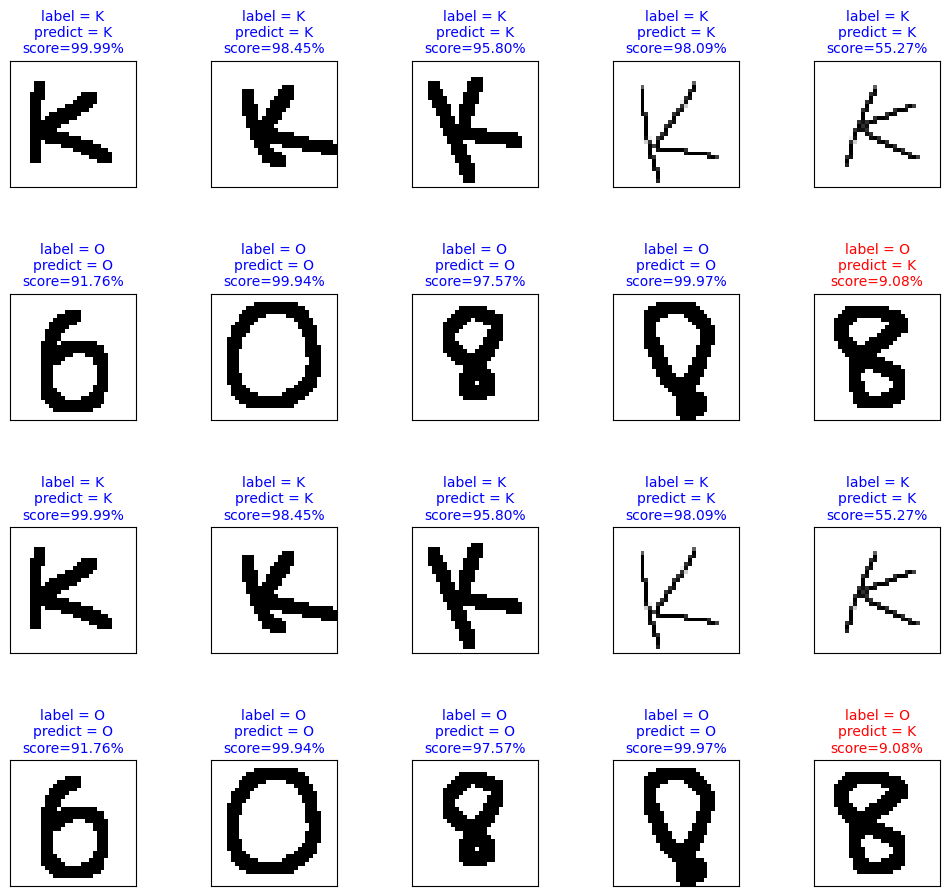

In [11]:
#標籤名稱
NAMES = ['O', 'K']
plot_images_labels_prediction(test_feature, np.argmax(test_label_onehot, axis=1), np.argmax(predict, axis=1), NAMES, predictions_array=predict)